# Sentiment140

In [84]:
dataset = "Sentiment140"

In [85]:
import warnings 
warnings.filterwarnings('ignore')

In [86]:
import pandas as pd

In [87]:
data = pd.read_csv(f'../Datasets/Raw/{dataset}/data.csv', encoding='ISO-8859-1')

In [88]:
data.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [89]:
data.shape

(1600000, 6)

In [90]:
data.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [91]:
data.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [92]:
data.nunique()

target          2
ids       1598315
date       774363
flag            1
user       659775
text      1581466
dtype: int64

In [93]:
data["target"].unique()

array([0, 4])

In [94]:
data.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [95]:
data.drop(columns=['ids', 'date', 'flag', 'user'], inplace=True)

In [96]:
data['TEXT'] = None

In [97]:
data.nunique()

target          2
text      1581466
TEXT            0
dtype: int64

In [98]:
data.rename(columns={'target':'CLASS'}, inplace=True)

In [99]:
print(data['CLASS'].unique())

[0 4]


In [100]:
from Preprocessor import preprocess

In [101]:
field = "text"

In [102]:
data

,CLASS,text,TEXT
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",None
1,0,is upset that he can't update his Facebook by ...,None
2,0,@Kenichan I dived many times for the ball. Man...,None
3,0,my whole body feels itchy and like its on fire,None
4,0,"@nationwideclass no, it's not behaving at all....",None
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,None
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,None
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,None
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,None


In [103]:
for i in range(len(data)):
    data['TEXT'][i] = preprocess(data[field].iloc[i])

In [104]:
data.sample(5)

,CLASS,text,TEXT
165843,0,@RobbiedaKid no I was too slow I hate getting...,robbiedakid slow hate get trailhead get
1043652,4,Three more FF @JohnKDavies @asimchoudhury @Ab...,three ff johnkdavi asimchoudhuri abbi davi
554865,0,"Finland. What's great about it, what sights sh...",finland great sight catch leav finland week pa...
1073661,4,I'm watching Pirates of the Carribbean 2. I lo...,watch pirat carribbean love pirat movi
1287765,4,"pretty much exhausted, but how i loved Pinkpop...",pretti much exhaust love pinkpop seen much lov...


In [105]:
data.isna().sum()

CLASS    0
text     0
TEXT     0
dtype: int64

In [107]:
data = data.drop(columns=['text'])

In [108]:
data.sample(5)

,CLASS,TEXT
846461,4,nellcadam uk greater london area gulliv travel...
750835,0,sick feel aw
930444,4,mileycyru http twitpic com xcwa awe cuut mine ...
71666,0,hate fall asleep pm awak sharp readi
377714,0,wish sleep chicken chicken jr instead alon


In [109]:
data.to_csv(f'../Datasets/Preprocessed/{dataset}/data.csv') 

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

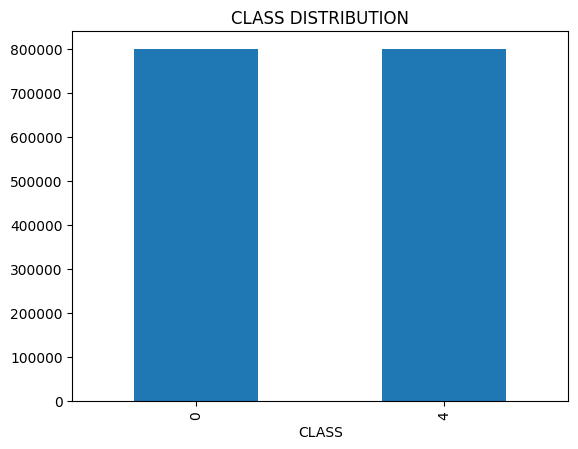

In [111]:
data.groupby('CLASS')['CLASS'].count().plot.bar()
plt.title('CLASS DISTRIBUTION')
plt.show()

In [112]:
data.dropna(inplace=True)

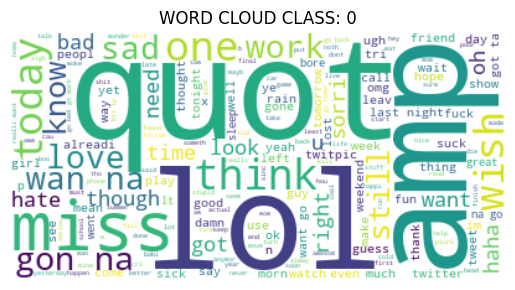

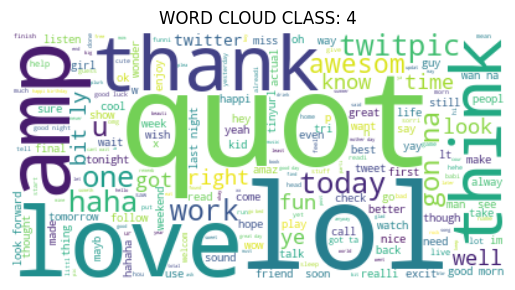

In [113]:
for value in data['CLASS'].unique():
    text = ' '.join(x for x in data[data['CLASS'] == value]['TEXT'])
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'WORD CLOUD CLASS: {value}')
    plt.show()